## Analysis of birds submissions Xeno-canto(Germany)


### Image of Common Blackbird

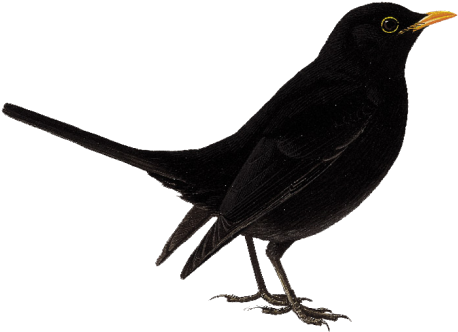

In [657]:
from IPython.display import Image
Image("SeekPng.com_black-bird-png_1332695.png")




### Read all the json files into a single Dataframe

In [658]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import glob
import os
import folium
json_files=glob.glob(os.path.join('//Users/selva/Bird_project/dataset/metadata/cnt_Germany/','*.json'))

In [659]:
data=[]
for f in json_files:
    #read the json file
    df=pd.read_json(f)
    data.append(df)
concated=pd.concat(data,axis=0,ignore_index=True)
concated

,numRecordings,numSpecies,page,numPages,recordings
0,27659,329,37,56,"{'id': '709930', 'gen': 'Turdus', 'sp': 'visci..."
1,27659,329,37,56,"{'id': '639796', 'gen': 'Turdus', 'sp': 'visci..."
2,27659,329,37,56,"{'id': '626430', 'gen': 'Turdus', 'sp': 'visci..."
3,27659,329,37,56,"{'id': '596276', 'gen': 'Turdus', 'sp': 'visci..."
4,27659,329,37,56,"{'id': '563155', 'gen': 'Turdus', 'sp': 'visci..."
...,...,...,...,...,...
27654,27659,329,18,56,"{'id': '701009', 'gen': 'Parus', 'sp': 'major'..."
27655,27659,329,18,56,"{'id': '700066', 'gen': 'Parus', 'sp': 'major'..."
27656,27659,329,18,56,"{'id': '699939', 'gen': 'Parus', 'sp': 'major'..."
27657,27659,329,18,56,"{'id': '699168', 'gen': 'Parus', 'sp': 'major'..."


### Adding the recordings column into the dataframe

In [660]:
concated=pd.concat([concated.drop(['recordings'], axis=1), concated['recordings'].apply(pd.Series)], axis=1)
concated

,numRecordings,numSpecies,page,numPages,id,gen,sp,ssp,en,rec,...,lic,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used
0,27659,329,37,56,709930,Turdus,viscivorus,,Mistle Thrush,Sven Kransel,...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,1:00,07:50,2022-03-05,2022-03-20,[],Tascam DR-05X – unattended-72h-recording - not...,no,no
1,27659,329,37,56,639796,Turdus,viscivorus,,Mistle Thrush,Sven Kransel,...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,1:54,08:35,2021-04-17,2021-04-17,"[Picus viridis, Phylloscopus trochilus, Phyllo...",,yes,no
2,27659,329,37,56,626430,Turdus,viscivorus,,Mistle Thrush,Jochen Völlm,...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,0:22,13:00,2021-02-28,2021-03-05,"[Parus major, Poecile palustris]",,yes,no
3,27659,329,37,56,596276,Turdus,viscivorus,,Mistle Thrush,W. Agster,...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,0:36,10:30,2020-10-13,2020-10-19,[],,yes,no
4,27659,329,37,56,563155,Turdus,viscivorus,,Mistle Thrush,Frank Holzapfel,...,//creativecommons.org/licenses/by-nc-nd/4.0/,B,3:17,17:13,2020-03-28,2020-05-29,[],Unattended recording from frequently used fore...,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27654,27659,329,18,56,701009,Parus,major,,Great Tit,Beatrix Saadi-Varchmin,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:39,10:28,2022-01-18,2022-02-08,"[Corvus frugilegus, Anser anser]",,yes,no
27655,27659,329,18,56,700066,Parus,major,,Great Tit,Beatrix Saadi-Varchmin,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:53,10:37,2022-01-18,2022-02-02,[],this full moon day all Great Tits seem to sin...,yes,no
27656,27659,329,18,56,699939,Parus,major,,Great Tit,Beatrix Saadi-Varchmin,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:35,09:33,2021-12-24,2022-02-01,[],"weather about 0°C, mild. A Great Tit sings its...",yes,no
27657,27659,329,18,56,699168,Parus,major,,Great Tit,Mathias Götz,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:04,13:30,2022-01-26,2022-01-28,[],,no,no


### 1. Top 3 Common birds- English names

In [661]:
result=concated['en'].value_counts().head()

In [662]:
result_1=result.drop(labels=['Soundscape','Identity unknown'])
result_1

Common Blackbird     1155
Great Tit             924
Common Chiffchaff     753
Name: en, dtype: int64

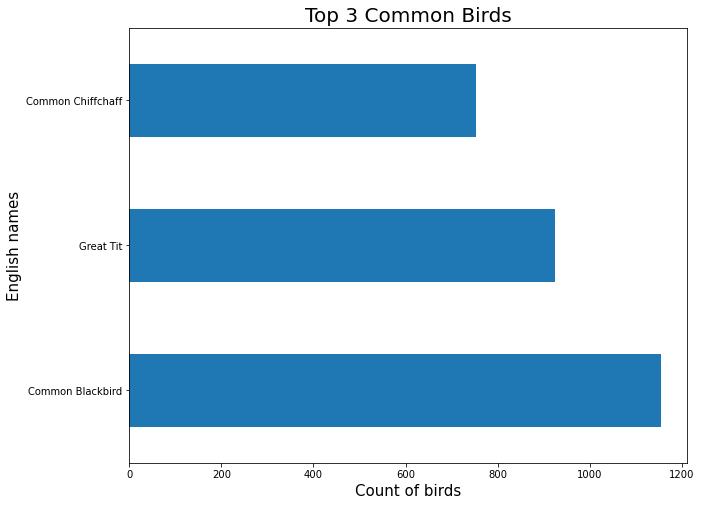

In [663]:
result_1.plot.barh(figsize=(10,8))
plt.xlabel('Count of birds',fontsize=15)
plt.ylabel('English names',fontsize=15)
plt.title('Top 3 Common Birds',fontsize=20)
plt.savefig('figure_1.png', dpi=350)

### 2. Least 3 birds - English names

In [664]:
result_2=concated['en'].value_counts().tail(60)

In [665]:
result_3=result_2[['Black-legged Kittiwake','Long-tailed Duck','Lesser White-fronted Goose']]
result_3

Black-legged Kittiwake        3
Long-tailed Duck              3
Lesser White-fronted Goose    2
Name: en, dtype: int64

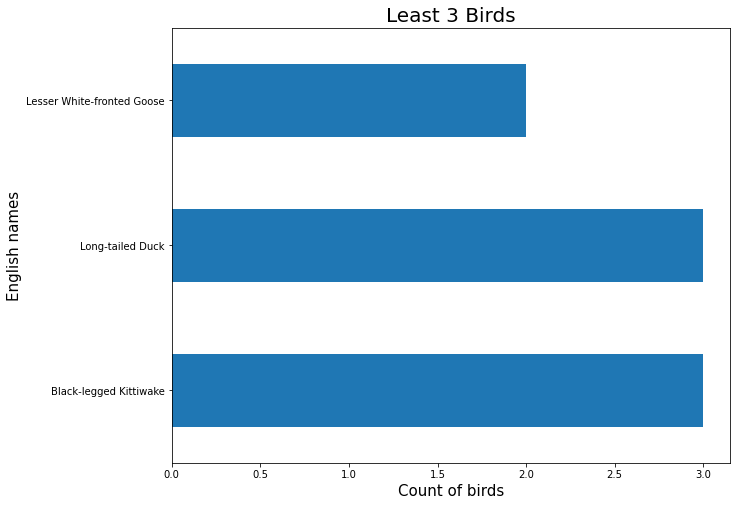

In [666]:
result_3.plot.barh(figsize=(10,8))
plt.xlabel('Count of birds',fontsize=15)
plt.ylabel('English names',fontsize=15)
plt.title('Least 3 Birds',fontsize=20)
plt.savefig('figure_2.png', dpi=350)

### 3. Top 3 localities in Germany

In [667]:
concated['loc']

0               Hanover Region (near  Uetze), Lower Saxony
1                      Uelzen (near  Eimke), Niedersachsen
2        Enzkreis (near  Pforzheim), Karlsruhe, Baden-W...
3                     Frankfurt am Main, Darmstadt, Hessen
4        Naturpark Stromberg-Heuchelberg, Baden-Württem...
                               ...                        
27654    Dorfende Stoffen (near  Lengenfeld), Oberbayer...
27655    Dorfende Stoffen (near  Lengenfeld), Oberbayer...
27656    Kirchstr. 23,  Hagenheim/Hofstetten, near Land...
27657      München (near  Taufkirchen), Oberbayern, Bayern
27658                   Meissen (near  Moritzburg), Saxony
Name: loc, Length: 27659, dtype: object

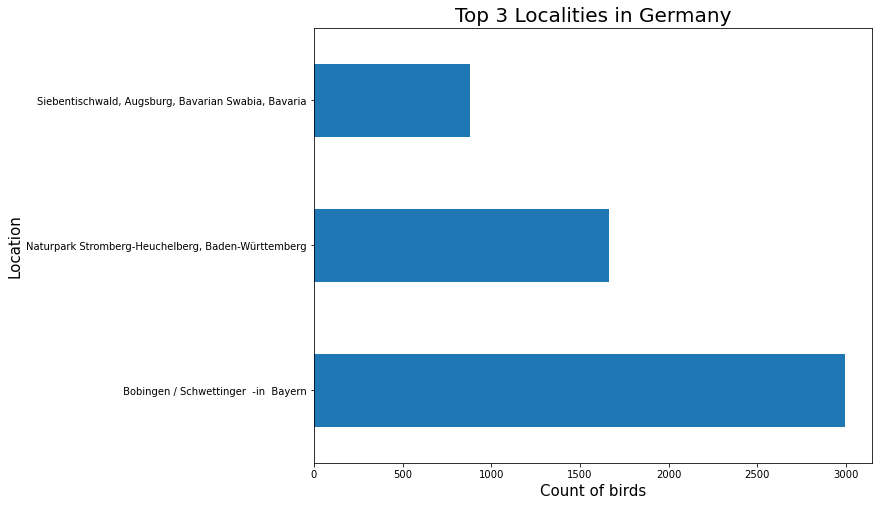

In [668]:
loc=concated['loc'].value_counts().head(3).plot.barh(figsize=(10,8))
plt.xlabel('Count of birds',fontsize=15)
plt.ylabel('Location',fontsize=15)
plt.title('Top 3 Localities in Germany',fontsize=20)
plt.savefig('figure_3.png', dpi=350)

### 4. Top 3 Recordists 

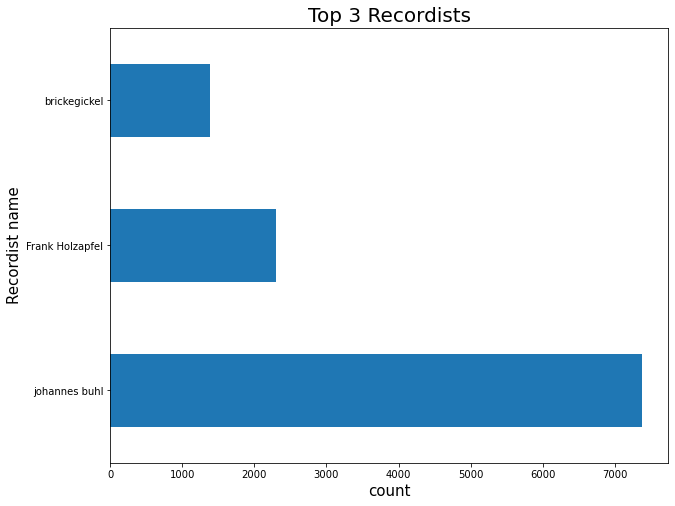

In [669]:
result1=concated['rec'].value_counts().head(3).plot.barh(figsize=(10,8))
plt.ylabel('Recordist name',fontsize=15)
plt.xlabel('count',fontsize=15)
plt.title('Top 3 Recordists', fontsize=20)
plt.savefig('figure_4.png', dpi=150)

### 5.   Investigation of Top 3 Common birds

In [670]:
concated['year'] = concated['date'].str[0:4]

In [671]:
bb= concated[concated['en'] == 'Common Blackbird']
bb

,numRecordings,numSpecies,page,numPages,id,gen,sp,ssp,en,rec,...,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used,year
15659,27659,329,33,56,484932,Turdus,merula,,Common Blackbird,Beatrix Saadi-Varchmin,...,A,9:07,21:27,2019-06-16,2019-07-06,"[Phoenicurus ochruros, Delichon urbicum, Turdu...","a late evening song, peacefully and calm. New ...",yes,no,2019
15660,27659,329,33,56,483332,Turdus,merula,,Common Blackbird,Beatrix Saadi-Varchmin,...,A,9:05,21:12,2019-06-16,2019-06-25,"[Phoenicurus ochruros, Delichon urbicum, Turdu...","a late evening song, peacefully and calm",yes,no,2019
15661,27659,329,33,56,479461,Turdus,merula,,Common Blackbird,Jorge Leitão,...,A,0:04,16:21,2019-05-23,2019-06-07,[],,yes,no,2019
15662,27659,329,33,56,479068,Turdus,merula,,Common Blackbird,Jorge Leitão,...,A,0:43,19:51,2019-05-22,2019-06-06,[Turdus merula],,yes,no,2019
15663,27659,329,33,56,470567,Turdus,merula,,Common Blackbird,Bodo Sonnenburg,...,A,1:21,05:00,2019-05-05,2019-05-05,"[Parus major, Cuculus canorus, Erithacus rubec...",,yes,no,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26154,27659,329,34,56,308776,Turdus,merula,,Common Blackbird,johannes buhl,...,D,4:53,11:00,2016-03-22,2016-03-26,[Garrulus glandarius],bird was perched in a tree of a tree-lined-str...,no,no,2016
26155,27659,329,34,56,308774,Turdus,merula,,Common Blackbird,johannes buhl,...,D,10:23,11:00,2016-03-22,2016-03-26,"[Turdus pilaris, Picus viridis, Corvus corone,...","""subsong & alarm call & song"" -- bird was perc...",no,no,2016
26156,27659,329,34,56,308767,Turdus,merula,,Common Blackbird,johannes buhl,...,D,8:55,08:30,2016-03-22,2016-03-26,[Picus viridis],bird perched in a tree of a tree-lined-street ...,no,no,2016
26157,27659,329,34,56,308765,Turdus,merula,,Common Blackbird,johannes buhl,...,D,6:29,08:00,2016-03-22,2016-03-26,"[Garrulus glandarius, Parus major, Picus viridis]",bird perched in a tree of a tree-lined-street ...,no,no,2016


#### 5.1 Common Blackbird

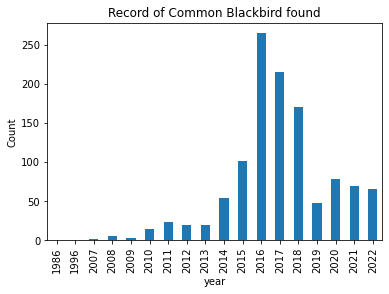

In [672]:
bb1 = bb.groupby('year')['en'].count()
bb1.plot.bar(ylabel='Count', title='Record of Common Blackbird found')
plt.savefig('figure_5.png', dpi=300)

#### 5.1.1 Common Blackbird seen

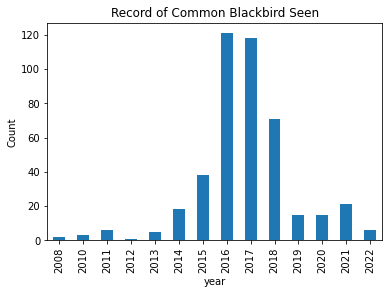

In [673]:
bb2= bb[bb['bird-seen'] == 'yes']
bb3 = bb2.groupby('year')['bird-seen'].count().plot.bar(ylabel='Count', title='Record of Common Blackbird Seen')
plt.savefig('figure_6.png', dpi=300)

#### 5.1.2 Common Localitites of Common Blackbird

In [674]:
bb4=bb['loc'].value_counts().head(3)
bb4

Essen-Werden, Ruhrgebiet, Nordrhein-Westfalen    255
 Bobingen / Schwettinger  -in  Bayern            192
Hochdorf / Eberdingen, Baden-Württemberg          58
Name: loc, dtype: int64

#### 5.1.3 Popular Recordists of Common Blackbird

In [675]:
bb5=bb['rec'].value_counts().head(3)
bb5

johannes buhl      444
Timo Schnabel      269
Frank Holzapfel    101
Name: rec, dtype: int64

#### 5.2 Great Tit

In [676]:
gt= concated[concated['en'] == 'Great Tit']
gt

,numRecordings,numSpecies,page,numPages,id,gen,sp,ssp,en,rec,...,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used,year
3659,27659,329,20,56,117166,Parus,major,,Great Tit,Buhl Johannes,...,B,0:21,09:00,2013-01-07,2013-01-10,[],In mixed forest.,no,unknown,2013
3660,27659,329,20,56,117018,Parus,major,,Great Tit,Buhl Johannes,...,B,0:20,10:30,2013-01-07,2013-01-08,[],In mixed forest,unknown,unknown,2013
3661,27659,329,20,56,117017,Parus,major,,Great Tit,Buhl Johannes,...,B,0:43,10:30,2013-01-07,2013-01-08,[],In mixed forest,unknown,unknown,2013
3662,27659,329,20,56,116411,Parus,major,,Great Tit,Buhl Johannes,...,B,0:42,09:30,2013-01-02,2013-01-03,[],In mixed forest with high rate of bushes,no,unknown,2013
3663,27659,329,20,56,114311,Parus,major,,Great Tit,Buhl Johannes,...,B,1:55,08:00,2012-12-06,2012-12-09,[],In mixed forest by an open source vegetation -...,unknown,unknown,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27654,27659,329,18,56,701009,Parus,major,,Great Tit,Beatrix Saadi-Varchmin,...,A,0:39,10:28,2022-01-18,2022-02-08,"[Corvus frugilegus, Anser anser]",,yes,no,2022
27655,27659,329,18,56,700066,Parus,major,,Great Tit,Beatrix Saadi-Varchmin,...,A,0:53,10:37,2022-01-18,2022-02-02,[],this full moon day all Great Tits seem to sin...,yes,no,2022
27656,27659,329,18,56,699939,Parus,major,,Great Tit,Beatrix Saadi-Varchmin,...,A,0:35,09:33,2021-12-24,2022-02-01,[],"weather about 0°C, mild. A Great Tit sings its...",yes,no,2021
27657,27659,329,18,56,699168,Parus,major,,Great Tit,Mathias Götz,...,A,0:04,13:30,2022-01-26,2022-01-28,[],,no,no,2022


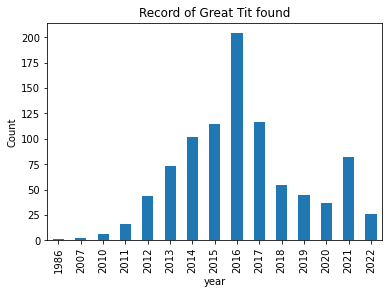

In [677]:
gt1 = gt.groupby('year')['en'].count()
gt1.plot.bar(ylabel='Count', title='Record of Great Tit found')
plt.savefig('figure_7.png', dpi=300)

#### 5.2.1 Common Localitites of Great Tit

In [678]:
gt4=gt['loc'].value_counts().head(3)
gt4

 Bobingen / Schwettinger  -in  Bayern                  86
Naturpark Stromberg-Heuchelberg, Baden-Württemberg     80
Siebentischwald, Augsburg, Bavarian Swabia, Bavaria    68
Name: loc, dtype: int64

#### 5.2.2  Popular Recordists of Great Tit

In [679]:
gt5=gt['rec'].value_counts().head(4)
gt5

johannes buhl      378
Buhl Johannes      118
Frank Holzapfel    102
Jorge Leitão        38
Name: rec, dtype: int64

#### 5.3 Common Chiffchaff

In [680]:
ch= concated[concated['en'] == 'Common Chiffchaff']
ch

,numRecordings,numSpecies,page,numPages,id,gen,sp,ssp,en,rec,...,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used,year
17159,27659,329,24,56,316432,Phylloscopus,collybita,tristis,Common Chiffchaff,brickegickel,...,B,0:12,11:00,2016-05-14,2016-05-14,[],"this is the bird of XC316386, recording from U.E.",yes,no,2016
17160,27659,329,24,56,316386,Phylloscopus,collybita,tristis,Common Chiffchaff,brickegickel,...,B,0:12,11:00,2016-05-14,2016-05-14,[],"high pass filter, Verdacht auf: Phylloscopus c...",yes,no,2016
17161,27659,329,24,56,312619,Phylloscopus,collybita,,Common Chiffchaff,Paul Ehlers,...,B,0:25,07:18,2016-04-17,2016-04-17,[],,yes,no,2016
17162,27659,329,24,56,312289,Phylloscopus,collybita,,Common Chiffchaff,Christoph Bock,...,B,0:39,11:00,2016-04-14,2016-04-14,[],A presumable mixed singer Common Chiffchaff X ...,yes,no,2016
17163,27659,329,24,56,307983,Phylloscopus,collybita,,Common Chiffchaff,Frank Holzapfel,...,B,2:21,?,2016-03-20,2016-03-21,[],Perched in treetop. This years' first observat...,no,no,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21154,27659,329,23,56,333086,Phylloscopus,collybita,,Common Chiffchaff,johannes buhl,...,B,3:31,07:30,2016-08-29,2016-09-03,"[Erithacus rubecula, Certhia brachydactyla]",recorded in a park and by fields -- background...,unknown,no,2016
21155,27659,329,23,56,330820,Phylloscopus,collybita,,Common Chiffchaff,johannes buhl,...,B,8:32,?,2016-08-07,2016-08-11,[],"""call-adult&call-juvenile"" -- in mixed forest ...",no,no,2016
21156,27659,329,23,56,330816,Phylloscopus,collybita,,Common Chiffchaff,johannes buhl,...,B,24:34,?,2016-08-07,2016-08-11,[Anser anser],"""call-adult & call-juvenile"" -- in mixed fores...",no,no,2016
21157,27659,329,23,56,330815,Phylloscopus,collybita,,Common Chiffchaff,johannes buhl,...,B,15:21,?,2016-08-07,2016-08-11,[],"""call-adult & call-juvenile"" -- in mixed fores...",no,no,2016


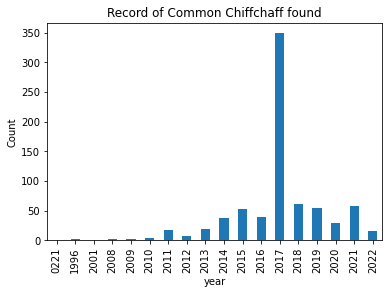

In [681]:
ch1 = ch.groupby('year')['en'].count()
ch1.plot.bar(ylabel='Count', title='Record of Common Chiffchaff found')
plt.savefig('figure_8.png', dpi=300)

#### 5.3.1 Common Localitites of Common  Chiffchaff

In [682]:
ch4=ch['loc'].value_counts().head(3)
ch4

Naturpark Stromberg-Heuchelberg, Baden-Württemberg       223
 Bobingen / Schwettinger  -in  Bayern                     89
Augsburg, Siebentischwald, east of past Behringer Hof     25
Name: loc, dtype: int64

#### 5.3.2 Popular Recordists of Common Chiffchaff

In [683]:
ch5=ch['rec'].value_counts().head(4)
ch5

Frank Holzapfel    271
johannes buhl      168
Buhl Johannes       32
W. Agster           24
Name: rec, dtype: int64

### 6.   Investigation of  Least 3 birds -for comparison
#### 6.1  Black-legged Kittiwake

In [684]:
bl= concated[concated['en'] == 'Black-legged Kittiwake']
bl

,numRecordings,numSpecies,page,numPages,id,gen,sp,ssp,en,rec,...,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used,year
15478,27659,329,6,56,671197,Rissa,tridactyla,,Black-legged Kittiwake,Beatrix Saadi-Varchmin,...,B,0:57,22:07,2021-06-28,2021-08-30,[Uria aalge],Colony on the Lummen cliffs. Most pairs now ha...,yes,no,2021
15479,27659,329,6,56,328164,Rissa,tridactyla,,Black-legged Kittiwake,Jorick van Arneym,...,B,0:08,18:10,2016-04-29,2016-07-23,[Morus bassanus],Call when flying by the colony at the cliffs.,yes,no,2016
15480,27659,329,6,56,376827,Rissa,tridactyla,,Black-legged Kittiwake,brickegickel,...,C,0:06,18:00,2017-06-14,2017-06-24,[Uria aalge],high pass filter,yes,no,2017


In [685]:
bl=bl.dropna()


<AxesSubplot:title={'center':'Record of Black-legged Kittiwake found'}, xlabel='year', ylabel='Count'>

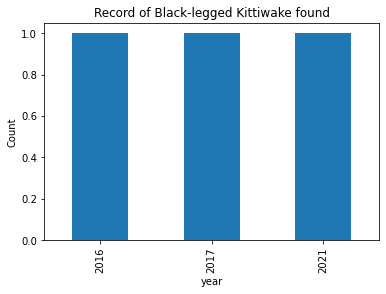

In [686]:
bl1 = bl.groupby('year')['en'].count()
bl1.plot.bar(ylabel='Count', title='Record of Black-legged Kittiwake found')


#### 6. 1 .1 Black-legged Kittiwake seen

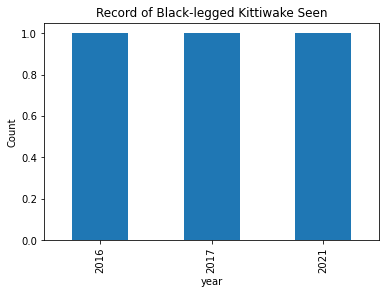

In [687]:
bl2= bl[bl['bird-seen'] == 'yes']
bl3 = bl2.groupby('year')['bird-seen'].count().plot.bar(ylabel='Count', title='Record of Black-legged Kittiwake Seen')

#### 6.1.2 Common Localitites of Black-legged Kittiwake

In [688]:
bl4=bl['loc'].value_counts().head(3)
bl4

Lummenfelsen, Heligoland, Schleswig-Holstein                1
Pinneberg (near  Helgoland), Schleswig-Holstein             1
Schleswig-Holstein (near  Helgoland), Schleswig-Holstein    1
Name: loc, dtype: int64

#### 6.1.3 Popular Recordists of Black-legged Kittiwake

In [689]:
bl5=bl['rec'].value_counts().head(4)
bl5

Beatrix Saadi-Varchmin    1
Jorick van Arneym         1
brickegickel              1
Name: rec, dtype: int64

#### 6.2 Long-tailed Duck

In [690]:
ld= concated[concated['en'] == 'Long-tailed Duck']
ld

,numRecordings,numSpecies,page,numPages,id,gen,sp,ssp,en,rec,...,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used,year
799,27659,329,2,56,617246,Clangula,hyemalis,,Long-tailed Duck,Lars Redetzke,...,A,0:18,13:30,2020-01-24,2021-01-24,[],Two displaying males,yes,no,2020
800,27659,329,2,56,617244,Clangula,hyemalis,,Long-tailed Duck,Lars Redetzke,...,B,0:10,13:00,2020-01-24,2021-01-24,[],Calls given only by the male specimen 2-4 time...,yes,no,2020
801,27659,329,2,56,439729,Clangula,hyemalis,,Long-tailed Duck,Olli Juhnke,...,D,0:25,09:30,2018-03-27,2018-10-22,[],"Noise lifted with audacity, recorded with iPhone",yes,unknown,2018


#### 6.2.1 Common Localities of Long-tailed Duck

In [691]:
ld4=ld['loc'].value_counts().head(3)
ld4

Greifswalder Oie, Mecklenburg-Vorpommern         2
Ostholstein (near  Dahme), Schleswig-Holstein    1
Name: loc, dtype: int64

#### 6.2.2 Popular Recordists of Long-tailed Duck

In [692]:
ld5=ld['rec'].value_counts().head(3)
ld5

Lars Redetzke    2
Olli Juhnke      1
Name: rec, dtype: int64

#### 6.3 Lesser White-fronted Goose

In [693]:
lw= concated[concated['en'] == 'Lesser White-fronted Goose']
lw

,numRecordings,numSpecies,page,numPages,id,gen,sp,ssp,en,rec,...,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used,year
26554,27659,329,1,56,70923,Anser,erythropus,,Lesser White-fronted Goose,Martin Miethke,...,D,0:13,08:00,2008-03-08,2011-01-31,[Anser albifrons],One bird (not seen) in between a flock of Grea...,no,no,2008
26555,27659,329,1,56,44578,Anser,erythropus,,Lesser White-fronted Goose,Matthias Feuersenger,...,E,0:04,10:15,2010-02-14,2010-02-18,[],Lesser white-fronted goose giving a single hig...,yes,no,2010


#### 6.3.1 Common Localities of Lesser White-fronted Goose

In [694]:
lw4=lw['loc'].value_counts().head(3)
lw4

Gülpe, Brandenburg                                1
Bosse/Aller (near  Frankenfeld), Niedersachsen    1
Name: loc, dtype: int64

#### 6.3.2 Popular Recordists of Lesser White-fronted Goose

In [695]:
lw5=lw['rec'].value_counts().head(3)
lw5

Martin Miethke          1
Matthias Feuersenger    1
Name: rec, dtype: int64

### 7. Spacio-Temporal variaition of Common Black-bird

In [696]:
new_df = pd.DataFrame({'Name' : bb['en'],'lat': bb['lat'], 'lng': bb['lng'], 'year':bb['year']})
new_df=new_df.dropna()
new_df.info()
new_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117 entries, 15659 to 26158
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1117 non-null   object
 1   lat     1117 non-null   object
 2   lng     1117 non-null   object
 3   year    1117 non-null   object
dtypes: object(4)
memory usage: 43.6+ KB


,Name,lat,lng,year
15659,Common Blackbird,47.9984,10.9503,2019
15660,Common Blackbird,47.998,10.9509,2019
15661,Common Blackbird,49.4292,8.6563,2019
15662,Common Blackbird,49.4292,8.6563,2019
15663,Common Blackbird,52.3387,13.8246,2019
...,...,...,...,...
26154,Common Blackbird,48.2981,10.9178,2016
26155,Common Blackbird,48.2981,10.9178,2016
26156,Common Blackbird,48.2981,10.9178,2016
26157,Common Blackbird,48.2981,10.9178,2016


In [697]:
new_df['year_int']=new_df['year'].astype(int)

In [698]:
new_df['lat_flt']=new_df['lat'].astype(float)
new_df['lng_flt']=new_df['lng'].astype(float)

In [699]:
new_df1=pd.DataFrame({'name':new_df['Name'],'lat_flt':new_df['lat'],'lng_flt':new_df['lng'],'year_int':new_df['year']})
new_df1

,name,lat_flt,lng_flt,year_int
15659,Common Blackbird,47.9984,10.9503,2019
15660,Common Blackbird,47.998,10.9509,2019
15661,Common Blackbird,49.4292,8.6563,2019
15662,Common Blackbird,49.4292,8.6563,2019
15663,Common Blackbird,52.3387,13.8246,2019
...,...,...,...,...
26154,Common Blackbird,48.2981,10.9178,2016
26155,Common Blackbird,48.2981,10.9178,2016
26156,Common Blackbird,48.2981,10.9178,2016
26157,Common Blackbird,48.2981,10.9178,2016


In [700]:
file='Black_bird_1.csv'
new_df1.to_csv(file)

In [701]:
location = "Black_bird_1.csv"
black_bird_locations = pd.read_csv(location)

In [702]:
black_bird_locations = black_bird_locations[["lat_flt", "lng_flt", 'year_int']]
black_bird_locations.set_index('year_int')

,lat_flt,lng_flt
year_int,,
2019,47.9984,10.9503
2019,47.9980,10.9509
2019,49.4292,8.6563
2019,49.4292,8.6563
2019,52.3387,13.8246
...,...,...
2016,48.2981,10.9178
2016,48.2981,10.9178
2016,48.2981,10.9178


In [703]:
map = folium.Map(location=[black_bird_locations.lat_flt.mean(), 
                           black_bird_locations.lng_flt.mean()], zoom_start=5, control_scale=True)

In [704]:
for index, location_info in black_bird_locations.iterrows():
    folium.Marker([location_info["lat_flt"], location_info["lng_flt"]], popup=location_info["year_int"]).add_to(map)
map

### 7. Spacio-Temporal variation of Black_legged_Kittiwake

In [705]:
Black_legged_Kittiwake= pd.DataFrame({'Name' : cn['en'],'lat': cn['lat'], 'lng': cn['lng'], 'year':cn['year']})
Black_legged_Kittiwake

,Name,lat,lng,year
15478,Black-legged Kittiwake,54.1862,7.8737,2021
15479,Black-legged Kittiwake,54.1854,7.8755,2016
15480,Black-legged Kittiwake,54.1864,7.8737,2017


In [706]:
file_1='Black_legged_Kittiwake.csv'
Black_legged_Kittiwake.to_csv(file_1)

In [707]:
location = "Black_legged_Kittiwake.csv"
Black_legged_Kittiwake_locations = pd.read_csv(location)

In [708]:
map_1 = folium.Map(location=[Black_legged_Kittiwake_locations.lat.mean(), 
                           Black_legged_Kittiwake_locations.lng.mean()], zoom_start=16, control_scale=True)

In [709]:
for index, location_info in Black_legged_Kittiwake_locations.iterrows():
    folium.Marker([location_info["lat"], location_info["lng"]], popup=location_info["year"]).add_to(map_1)
map_1